# Optimierung mit SciPy

https://docs.scipy.org/doc/scipy/tutorial/optimize.html

In [2]:
import numpy as np
import plotly.graph_objects as go
from scipy import optimize

In [3]:
def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))-x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

bounds = [(-510, 510), (-510, 510)]

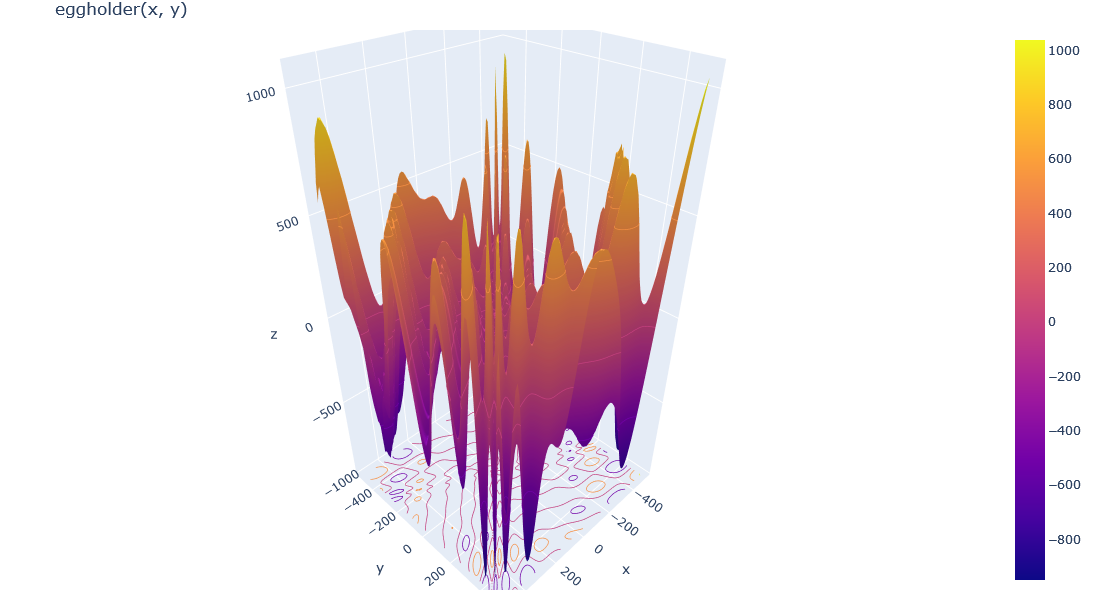

In [3]:
x = np.arange(-510, 511, 10)
y = np.arange(-510, 511, 10)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = go.Figure(data=[go.Surface(z=eggholder(xy), x=xgrid, y=ygrid)]) 
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='eggholder(x, y)', autosize=False, width=1000, height=600, margin=dict(l=20, r=20, b=10, t=30, pad=4))
fig.show()

In [4]:
results = dict()
results['shgo'] = optimize.shgo(eggholder, bounds)
results['shgo']

     fun: -935.3379515605752
    funl: array([-935.33795156])
 message: 'Optimization terminated successfully.'
    nfev: 51
     nit: 2
   nlfev: 46
   nlhev: 0
   nljev: 11
 success: True
       x: array([439.4809999 , 453.97743511])
      xl: array([[439.4809999 , 453.97743511]])

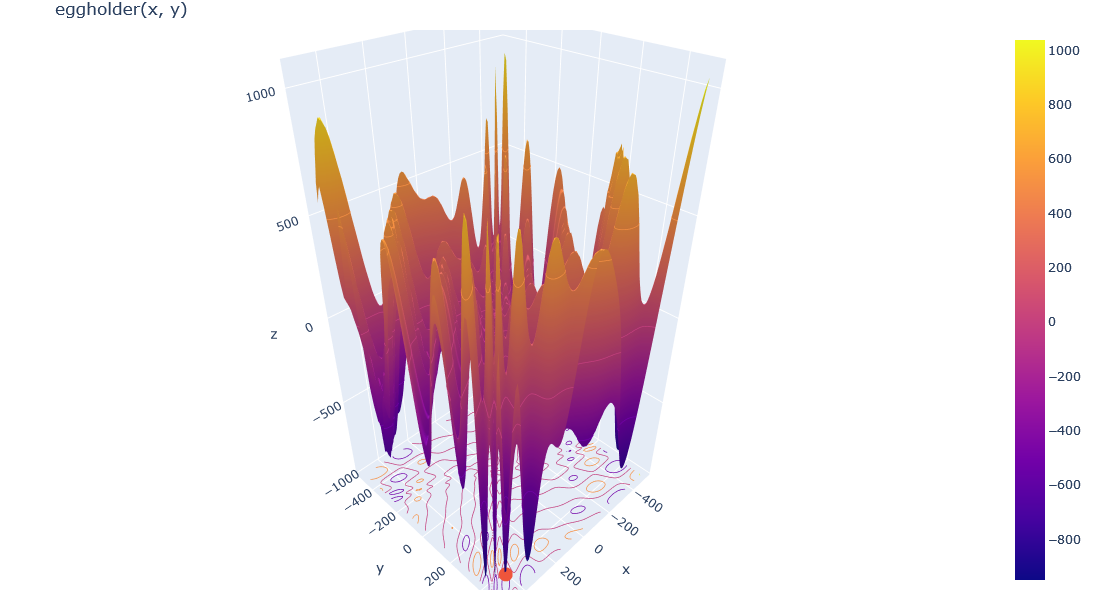

In [5]:
fig.add_trace(
    go.Scatter3d(x=[results['shgo']['x'][0]],
                 y=[results['shgo']['x'][1]],
                 z=[eggholder(results['shgo']['x'])],
                 mode='markers')
)
fig.show()

In [7]:
results['shgo_sobol'] = optimize.shgo(eggholder, bounds, n=200, iters=5, sampling_method='sobol')

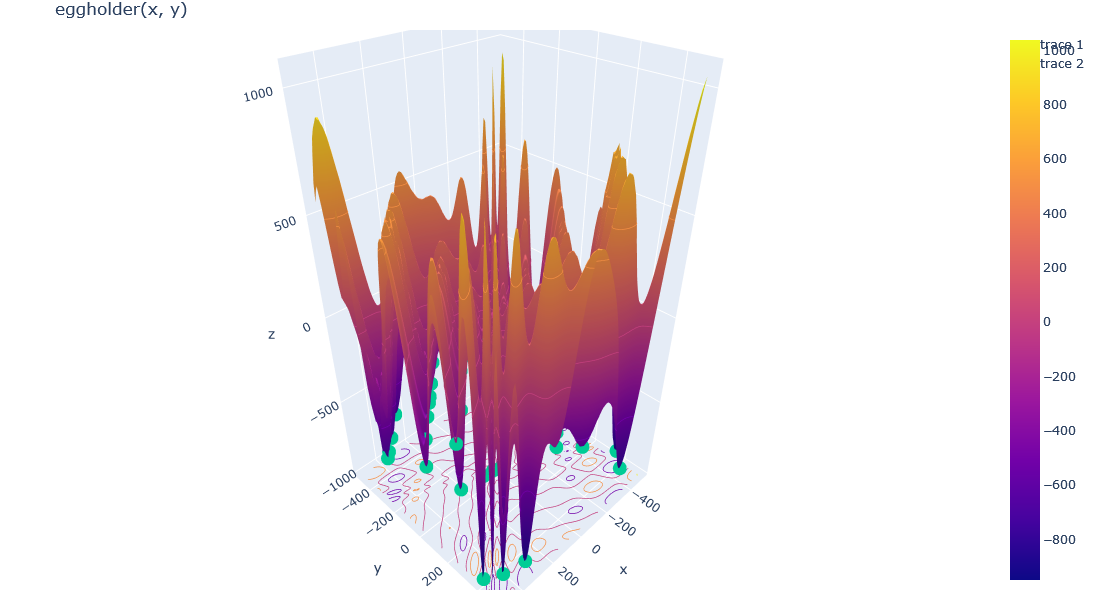

In [8]:
fig.add_trace(
    go.Scatter3d(x=results['shgo_sobol']['xl'].transpose()[0],
                 y=results['shgo_sobol']['xl'].transpose()[1],
                 z=results['shgo_sobol']['funl'],
                 mode='markers')
)
fig.show()